In [1]:
import numpy as np
from numpy import sin, pi, exp
import matplotlib.pyplot as plt

import gsw

In [2]:
# choose vertical resolution
#dr=np.array(80*np.ones(50))
dr=np.array(40*np.ones(100))
np.sum(dr) 
dr.shape
len(dr)



100

-4000.0


<ipython-input-3-5c8c389a6986>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cb=plt.pcolormesh(X,np.arange(0,ny+1,dy),bathy)


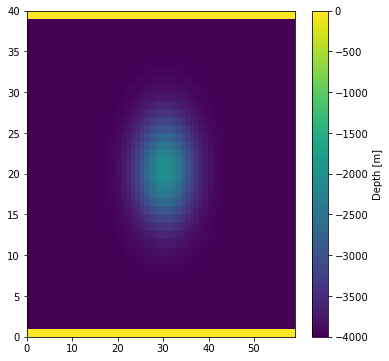

In [3]:
nx = 60
ny = 40
nr = len(dr)
rF = (np.insert(np.cumsum(dr),0,0)) # z-coordinates of vertical cell faces
z = np.diff(rF)/2 + rF[:-1]         # z-coordinates of vertical cell centers
H = -np.sum(dr)  
print(H)
# bathymetry -- flat bottom of depth H (m) with idealized mid-depth ridge
bump_max = 2000.   # peak height of ridge above flat bottom depth
bathy = H * np.ones([ny, nx])
bump = np.zeros([ny, nx])
# gaussian bump in the center of domain
# this is hard-coded for nx=20, ny=40 resolution
dx=1
dy=1
X=np.arange(0,nx,dx)
Y=np.arange(0,ny,dy)
[x,y] = np.meshgrid(X,Y)
# create a topography with a bump in the center to trigger a Taylor Column
X0=30
Y0=20;
width=40;
bump=(H+bump_max*np.exp(-((x-X0)**2+(y-Y0)**2)/width))


bathy =  bump;  
bathy[0,:-1] = 0.                     # wall at southern boundary
bathy[ny-1,:-1] = 0. 
bathy.astype('>f4').tofile(f'bathy_{len(dr)}.bin')
bathy.shape
plt.figure(figsize=(6,6))
cb=plt.pcolormesh(X,np.arange(0,ny+1,dy),bathy)
plt.colorbar(cb, label='Depth [m]')


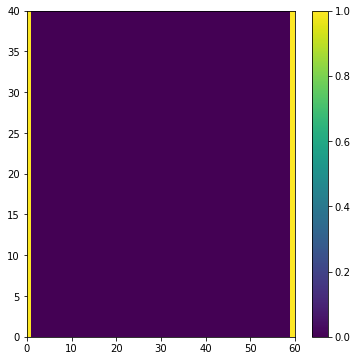

In [4]:
# 3-D mask for RBCS temperature relaxation
# note we implement "sponge layer" with full restoring at E and W boundary row (j=39),
rbcs_mask = np.zeros([nr, ny, nx])
rbcs_mask[:,:,0] = 1.0
rbcs_mask[:,:,-1] = 1.0

plt.figure(figsize=(6,6))
cb=plt.pcolormesh(np.arange(0,nx+1,dx),np.arange(0,ny+1,dy),rbcs_mask[0,:,:])
plt.colorbar(cb)
rbcs_mask.astype('>f4').tofile(f'U_relax_mask_{len(dr)}.bin')

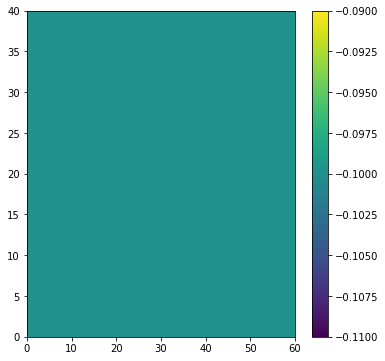

In [5]:
# 3-D U velocity field for initial conditions and RBCS eastern and western wall profile
u0=-0.1*np.ones((nx,ny,nr))
U_3D = np.reshape(u0, [nr,ny,nx]) 
U_3D.astype('>f4').tofile(f'Uvel_{len(dr)}.bin')
plt.figure(figsize=(6,6))
cb=plt.pcolormesh(np.arange(0,nx+1,dx),np.arange(0,ny+1,dy),U_3D[5,:,:])
plt.colorbar(cb)

In [6]:
ts=24
Ueast=-0.1*np.ones((ts,nr,ny))
print(Ueast.shape)
Ueast.T.astype('>f4').tofile(f'./OB_EastU_constant_24_{len(dr)}.bin')

(24, 100, 40)


In [7]:
ts=24
Ueast=-0.01*np.ones((ts,nr,ny))
print(Ueast.shape)
Ueast.T.astype('>f4').tofile(f'./OB_EastU_constant_24_001_{len(dr)}.bin')

(24, 100, 40)


In [22]:
ts=24
Ueast1=-0.1*np.ones((np.int(0.25*ts),nr,ny))
Ueast2=-0.2*np.ones((np.int(0.25*ts),nr,ny))

Ueast3=-0.5*np.ones((np.int(0.25*ts),nr,ny))


Ueast=np.concatenate((Ueast1,Ueast2,Ueast1,Ueast3))
print(Ueast.shape)
Ueast.T.astype('>f4').tofile(f'./OB_EastU_step_24_{len(dr)}.bin')

(24, 100, 40)


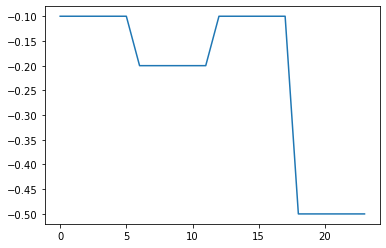

In [20]:
# test step function as boundary forcing
plt.plot(Ueast.mean(axis=1).mean(axis=1))

In [15]:
# Compute Eta for boundary forcing based on geostrophic velocity 
U0=-0.1
g=9.81
dy=50000
y=Y*dy
f=gsw.f(-65)
print(y)

[      0   50000  100000  150000  200000  250000  300000  350000  400000
  450000  500000  550000  600000  650000  700000  750000  800000  850000
  900000  950000 1000000 1050000 1100000 1150000 1200000 1250000 1300000
 1350000 1400000 1450000 1500000 1550000 1600000 1650000 1700000 1750000
 1800000 1850000 1900000 1950000]


In [32]:
print(y.shape)
print(y-y[17])

(40,)
[-850000 -800000 -750000 -700000 -650000 -600000 -550000 -500000 -450000
 -400000 -350000 -300000 -250000 -200000 -150000 -100000  -50000       0
   50000  100000  150000  200000  250000  300000  350000  400000  450000
  500000  550000  600000  650000  700000  750000  800000  850000  900000
  950000 1000000 1050000 1100000]


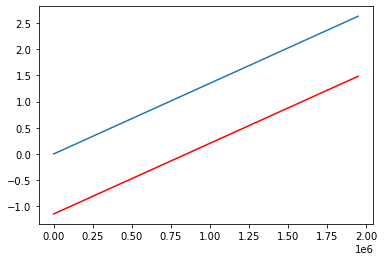

In [34]:
eta=(U0/g)*(f*y)
eta2=(U0/g)*(f*(y-y[17]))
plt.plot(y,eta)
plt.plot(y,eta2,color='r')

In [38]:
ts=24
etaEast=eta*np.ones((ts,ny))
print(etaEast.shape)
etaEast.T.astype('>f4').tofile(f'./OB_EastEta_constant_{len(dr)}.bin')

(24, 40)


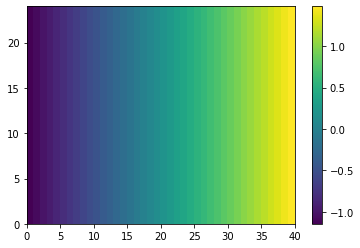

In [37]:
plt.pcolormesh(etaEast)
plt.colorbar()


In [ ]:
# Seasonal varying forcing

[0.         0.57119866 1.14239733 1.71359599 2.28479466 2.85599332
 3.42719199 3.99839065 4.56958931 5.14078798 5.71198664 6.28318531]


(12, 100, 40)

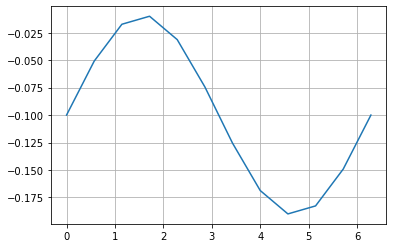

In [26]:
u0=-0.1

x=np.linspace(0,2*np.pi,12)
seasu=u0+sin(x)/5

print (x)
plt.plot(x,u0+sin(x)/11)
plt.grid()

Ueast=np.tile(seasu,[ny,nr,1])#.shape
Ueast.T.shape

In [27]:
Ueast.T.astype('>f4').tofile('./OB_EastU_obcs_100.bin')


<ipython-input-26-2ea2770c1e84>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Ueast[:,-1,:])


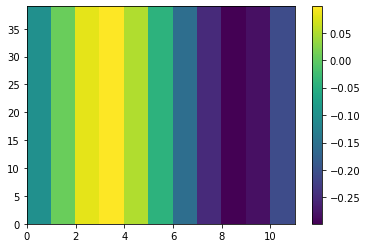

In [26]:
X,Y=np.meshgrid(np.arange(0,12,1),np.arange(0,40,1))
plt.pcolormesh(X,Y,Ueast[:,-1,:])
plt.colorbar()

In [10]:
u0 = -1 #.25;
#eastern and western boundary

uEast = np.ones((1,ny,nr))*u0#cat(3,(u0-du)*ones(ny,nz),(u0+du)*ones(ny,nz));
uEast
uEast.astype('>f4').tofile('./OB_EastU_obcs_test.bin')

In [32]:
uEast.shape

(2, 40, 50)